## 1. Thêm thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Đặt câu hỏi

#### Đọc dữ liệu đã tiền xử lí

In [2]:
cleaned_df = pd.read_csv("../data/cleaned_data.csv")
cleaned_df.head()

,Date_published,Name,Review_header,Review_body,Verified_review,Type_of_traveller,Seat_type,Route,Date_flown,Seat_comfort,Cabin_staff_service,Food_and_beverages,Inflight_entertainments,Ground_service,Value_for_money,Overall_rating,Recommended
0,2023-12-21,T Maddern,“I couldn’t fault them”,This was our first flight with British Airways...,Trip Verified,Family Leisure,Business Class,"['LONDON HEATHROW', 'STOCKHOLM']",2023-12-01,4,5,5,3,5,5,10,yes
1,2023-12-21,K Pearson,“incompetence in customer service”,I recently encountered a highly disappointing ...,Trip Verified,Solo Leisure,Economy Class,"['INDIANAPOLIS', 'MUMBAI', 'LONDON HEATHROW']",2023-12-01,1,1,3,3,1,1,1,no
2,2023-12-20,C Shaw,“The most ridiculous thing I've heard”,Beware! BA don't provide any refund due to a v...,Not Verified,Family Leisure,Premium Economy,"['CYPRUS', 'NEW YORK']",2023-12-01,3,3,3,3,1,1,1,no
3,2023-12-20,C Horner,"""one of the most disgusting onboard meals""",Check in was chaotic and badly organised. Even...,Trip Verified,Solo Leisure,Business Class,"['GRAN CANARIA', 'LONDON GATWICK']",2023-12-01,3,4,1,3,3,5,6,yes
4,2023-12-18,C Lowe,“Does BA pay experts to design these breakfasts”,All 4 of our flights were fine in terms of com...,Not Verified,Couple Leisure,Business Class,"['BELFAST CITY', 'ATLANTA', 'LONDON HEATHROW']",2023-11-01,4,5,1,3,5,5,6,yes


### Câu hỏi 1: Có sự khác biệt về tỉ lệ đề xuất sử dụng hãng bay giữa các loại hành khách không?

- **Mục đích:** Xác định xem loại hành khách nào (du lịch, công tác, v.v.) có mức độ hài lòng cao nhất hoặc thấp nhất qua tỷ lệ đề xuất.
- **Cách làm:** Sử dụng cột `Type_of_traveller và Recommended` để tính số lượng hành khách đề xuất có hoặc không của mỗi loại, sau đó tính tỷ lệ đề xuất cho mỗi loại.

#### Tiền xử lý

In [3]:
# Thực hiện group_by và đếm số lượng hành khách đề xuất cho mỗi nhóm
grouped_data = cleaned_df.groupby(['Type_of_traveller', 'Recommended']).size().reset_index(name='Count')

# Tính tổng recommended của mỗi nhóm
total_responses = grouped_data.groupby('Type_of_traveller')['Count'].sum().reset_index()

# Merge cột tổng vào dữ liệu
grouped_data = grouped_data.merge(total_responses, on='Type_of_traveller', suffixes=('', '_total'))

# Tính phần trăm cho số đề xuất của mỗi loại
grouped_data['Percentage'] = ((grouped_data['Count'] / grouped_data['Count_total']) * 100).round(1)
grouped_data

,Type_of_traveller,Recommended,Count,Count_total,Percentage
0,Business,no,498,642,77.6
1,Business,yes,144,642,22.4
2,Couple Leisure,no,659,1056,62.4
3,Couple Leisure,yes,397,1056,37.6
4,Family Leisure,no,254,402,63.2
5,Family Leisure,yes,148,402,36.8
6,Solo Leisure,no,496,900,55.1
7,Solo Leisure,yes,404,900,44.9


#### Trực quan hóa

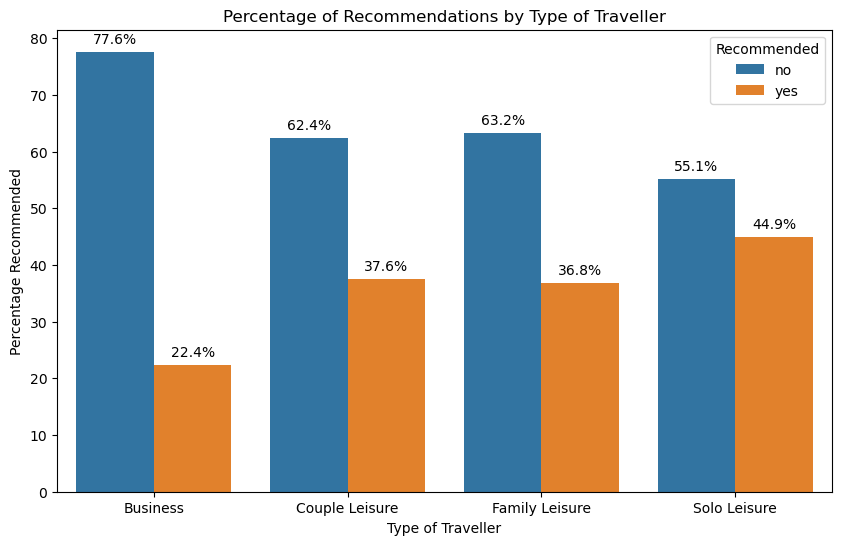

In [4]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Type_of_traveller', y='Percentage', hue='Recommended', data=grouped_data)

# Hiện tỷ lệ cho mỗi cột
for p in bar_plot.patches:
    if p.get_height() > 0:
        bar_plot.annotate(format(p.get_height(), '.1f') + '%', 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 9), 
                          textcoords = 'offset points')

plt.title('Percentage of Recommendations by Type of Traveller')
plt.xlabel('Type of Traveller')
plt.ylabel('Percentage Recommended')
plt.legend(title='Recommended', loc='upper right')

plt.show()

#### Nhận xét:
-   Hành khách đi công tác có tỷ lệ đề xuất không cao nhất (77.6%), cho thấy mức độ không hài lòng đáng kể.
-   Các cặp đôi đi giải trí và gia đình có tỷ lệ đề xuất không tương đối cao, lần lượt là 62.4% và 63.2%, cần cải thiện để tăng tỷ lệ hài lòng.
-   Hành khách đi giải trí một mình có tỷ lệ đề xuất có và không gần ngang nhau, phản ánh mức độ hài lòng trung lập. 
 
**=> Những số liệu này chỉ ra rằng hãng hàng không cần xem xét cải thiện dịch vụ, đặc biệt là cho hành khách đi công tác, để cải thiện tỷ lệ khuyến nghị.**

### Câu hỏi 2: Đánh giá của khách hàng về chất lượng chỗ ngồi ở mỗi hạng ghế khác nhau như thế nào? 
- **Mục đích:**
    - Biết được chất lượng chỗ ngồi ở hạng ghế nào được đánh giá cao nhất, thấp nhất và so sánh được mức độ hài lòng của khách hàng giữa chất lượng chỗ ngồi ở hạng ghế đắt tiền so với hạng ghế rẻ tiền.
    - **Đối với khách hàng:** giúp khách hàng chọn các hạng ghế có chất lượng chỗ ngồi được đánh giá cao.
    - **Đối với hãng hàng không:** giúp hãng hàng không cải thiện chất lượng chỗ ngồi ở các hạng ghế bị đánh giá thấp.
- **Cách làm:** Dựa vào 2 cột `Seat_type và Seat_comfort`, gom nhóm dựa trên cột `Seat_type` và tính phần trăm cho mỗi giá trị rating từ 1 đến 5 trong nhóm đó. 

#### Tiền xử lý

In [5]:
group_by_seat_type = cleaned_df.groupby('Seat_type')['Seat_comfort'].value_counts(normalize=True) * 100

data = {'Seat_type': group_by_seat_type.index.get_level_values('Seat_type'),
        'Seat_comfort': group_by_seat_type.index.get_level_values('Seat_comfort'),
        'Percentage': group_by_seat_type.values}
df = pd.DataFrame(data)
df

,Seat_type,Seat_comfort,Percentage
0,Business Class,3,24.648649
1,Business Class,1,23.891892
2,Business Class,4,23.567568
3,Business Class,2,16.216216
4,Business Class,5,11.675676
5,Economy Class,3,28.897104
6,Economy Class,1,26.370918
7,Economy Class,4,17.868145
8,Economy Class,2,17.436845
9,Economy Class,5,9.426987


#### Trực quan hoá

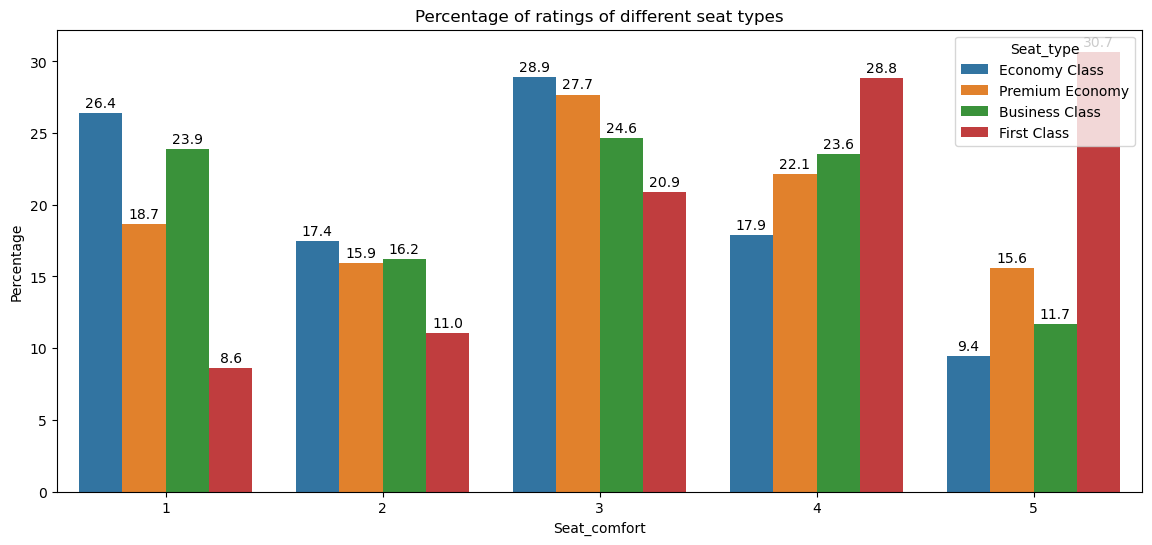

In [6]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='Seat_comfort', y='Percentage', hue='Seat_type', 
                 hue_order=['Economy Class', 'Premium Economy', 'Business Class', 'First Class'], data=df)

# Hiển thị số trên mỗi cột
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=2)
plt.title('Percentage of ratings of different seat types');

#### Nhận xét:
- Các hạng ghế có phần trăm đánh giá cao ở:
    - Hạng phổ thông: 1 và 3 sao.
    - Hạng phổ thông cao cấp: 3 và 4 sao.
    - Hạng thương gia: 1, 3 và 4 sao.
    - Hạng nhất: 3, 4 và 5 sao.
- Hạng phổ thông và hạng thương gia có phần trăm đánh giá 1 sao cao nhất, lần lượt là 26.4% và 23.9%.
- Hạng thương gia có phần trăm đánh giá 1 sao, 2 sao cao hơn hạng phổ thông cao cấp và có phần trăm đánh giá 3 sao, 5 sao thấp hơn hạng phổ thông cao cấp mặc dù chất lượng của hạng thương gia được xem là cao hơn hạng phổ thông cao cấp.
- Khoang ghế hạng nhất có phần trăm đánh giá 1 sao, 2 sao, 3 sao thấp nhất và đánh giá 4 sao, 5 sao cao nhất trong 4 hạng ghế.

**Từ đó chúng ta thấy được hãng hàng không British Airways có chất lượng chỗ ngồi khá tốt ở khoang hạng phổ thông cao cấp và khoang hạng nhất. Bên cạnh đó hãng bay cần cải thiện chất lượng chỗ ngồi ở khoang hạng phổ thông và hạng thương gia. Đặc biệt, cần xem xét kỹ lưỡng chất lượng chỗ ngồi ở khoang hạng thương gia do mức chi trả của khách hàng cho một chuyến bay hạng thương giá cao chỉ sau khoang hạng nhất.**

### Câu hỏi 3: Đánh giá sơ bộ của khách hàng đối với hãng bay liệu đã ổn chưa, cần cải thiện chỗ nào để nâng cao trải nghiệm của khách hàng ? 
- **Mục đích:** Để hãng bay biết được những gì đã có, hoặc cần cải thiện để trải nghiệm khách hàng tốt hơn?
- **Cách làm:** Ta sẽ quan tâm tới những cột đánh giá dịch vụ mức độ số (từ 1-5) và 'Recommend' để hiểu thêm về cảm nhận của khách hàng. Sau đó sẽ lọc ra những hạng vé có nhiều reccomend là 'no', sau đó tổng hợp dịch vụ bằng cách dùng mean cho từng loại ghế, đánh giá và nêu chỗ cần cải thiện.

**Trước hết, ta sẽ xem xét những 'Recommended' là "no" đến từ loại khách hàng nào nhiều, để tập trung vào giải quyết nhu cầu của loại khách hàng đó.**

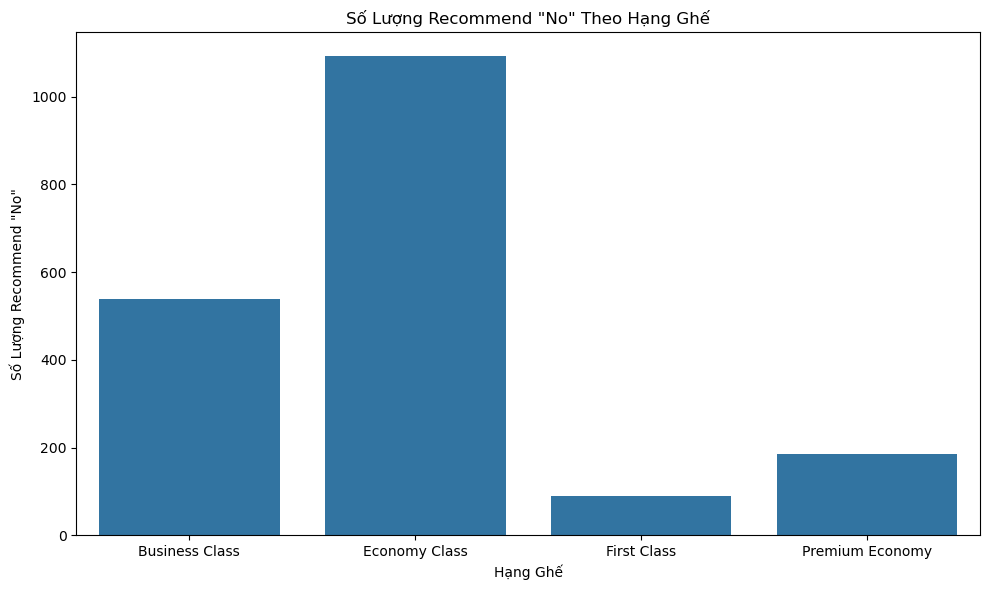

In [7]:
#group by theo Seat_type và count số lượng Recommend no
recommend_counts = cleaned_df[cleaned_df['Recommended'] == 'no'].groupby('Seat_type').size().reset_index(name='No_recommend_count')

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x='Seat_type', y='No_recommend_count', data=recommend_counts)
plt.title('Số Lượng Recommend "No" Theo Hạng Ghế')
plt.xlabel('Hạng Ghế')
plt.ylabel('Số Lượng Recommend "No"')
plt.tight_layout()
plt.show()

**Nhận xét:** 
- Có vẻ như là, ở business class và economy class, có nhiều khách hàng đã có trải nghiệm không quá tốt. (khá nhiều 'no' so với 2 class còn lại)

**Ta sẽ chú ý tới những voting của những người đi 2 class này để xem là họ đánh giá về các dịch vụ như thế nào và dịch vụ nào ảnh hưởng tới trải nghiệm của 2 class này như vậy.**

In [8]:
# Lấy ra các cột numeric (do làm việc trên rating)
numeric_columns = cleaned_df.select_dtypes(include='number')

# Phân loại dữ liệu cho Business class và Economy class
business_class_df = cleaned_df[(cleaned_df['Seat_type'] == 'Business Class') & (cleaned_df['Recommended']=='no')][numeric_columns.columns]
economy_class_df = cleaned_df[(cleaned_df['Seat_type'] == 'Economy Class') & (cleaned_df['Recommended']=='no')][numeric_columns.columns]

# Tính trung bình đánh giá của các dịch vụ cho từng loại hạng ghế
business_class_avg_ratings = business_class_df[['Seat_comfort', 'Cabin_staff_service', 'Food_and_beverages', 'Inflight_entertainments', 'Ground_service', 'Value_for_money']].mean()
economy_class_avg_ratings = economy_class_df[['Seat_comfort', 'Cabin_staff_service', 'Food_and_beverages', 'Inflight_entertainments', 'Ground_service', 'Value_for_money']].mean()

# Tạo DataFrame để hiển thị kết quả
ratings_df = pd.DataFrame({
    'Service': ['Seat_comfort', 'Cabin_staff_service', 'Food_and_beverages', 'Inflight_entertainments', 'Ground_service', 'Value_for_money'],
    'Business_Class': business_class_avg_ratings.values,
    'Economy_Class': economy_class_avg_ratings.values
})

# Hiển thị kết quả
print(ratings_df)

                   Service  Business_Class  Economy_Class
0             Seat_comfort        2.089054       2.112637
1      Cabin_staff_service        2.634508       2.369048
2       Food_and_beverages        2.087199       1.990842
3  Inflight_entertainments        2.437848       2.465201
4           Ground_service        2.250464       2.011905
5          Value_for_money        1.623377       1.673077


#### Trực quan hóa

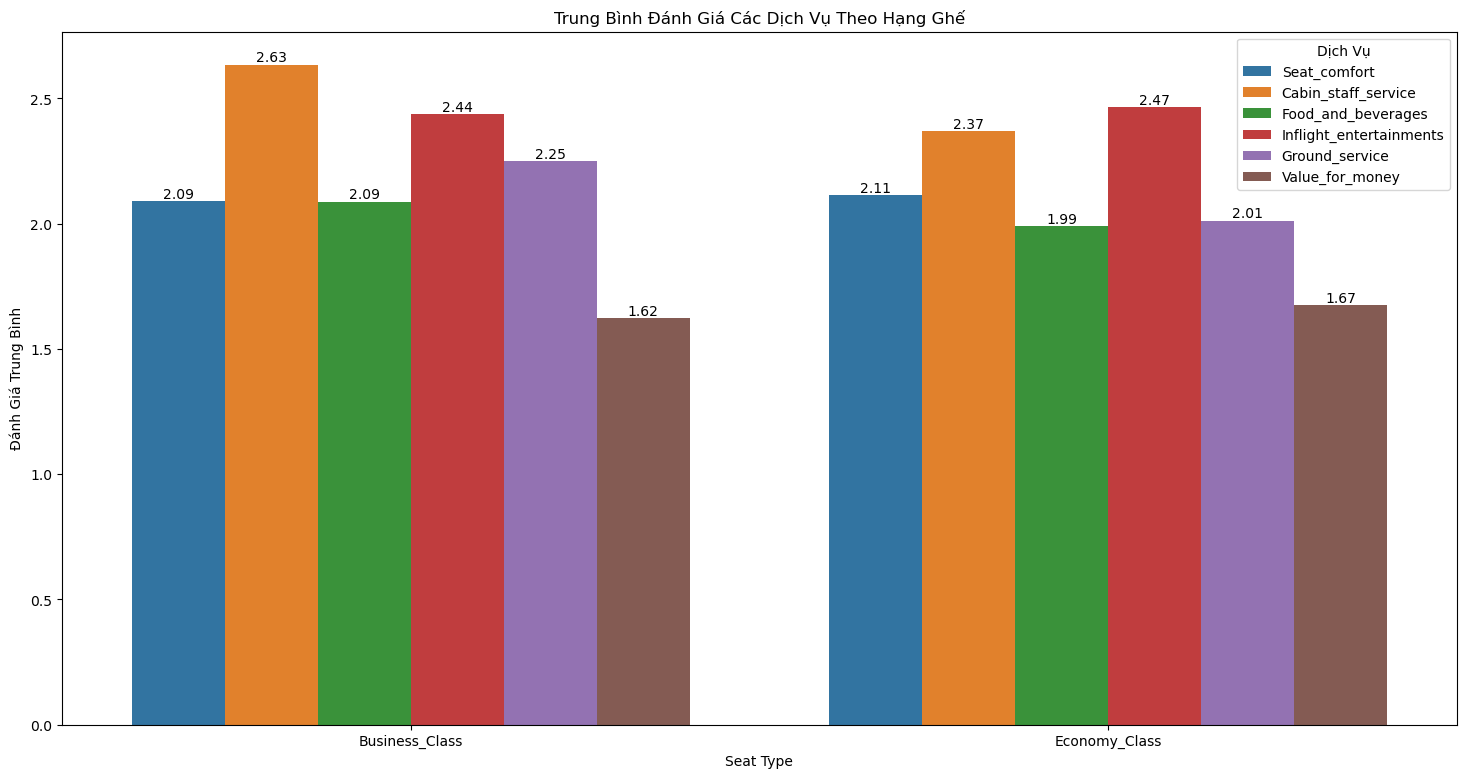

In [9]:

# Reshape DataFrame để phù hợp với biểu đồ
ratings_df_melted = pd.melt(ratings_df, id_vars='Service', var_name='Seat_Type', value_name='Average_Rating')

# Tạo biểu đồ barplot
plt.figure(figsize=(18, 9))
sns.barplot(x='Seat_Type', y='Average_Rating', hue='Service', data=ratings_df_melted)

# Hiển thị số liệu trực tiếp trên đỉnh mỗi cột
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Trung Bình Đánh Giá Các Dịch Vụ Theo Hạng Ghế')
plt.ylabel('Đánh Giá Trung Bình')
plt.xlabel('Seat Type')
plt.xticks(rotation=0)  # Đặt góc xoay của nhãn trục x
plt.legend(title='Dịch Vụ')
plt.show()

**Nhận xét:**
- Nhìn chung thì ở cả 2 class, đánh giá về các dịch khá thấp, khi mà trung bình của các dịch vụ được đánh giá quanh mức lân cận 2 (2/5), điều này nó có vẻ là khá tệ, khi mà điểm tối đa là 5, nhưng ở đây đa số còn chưa đạt tới 2.5 nữa.
- Cột 'Value_for_money' ở cả 2 loại ghế là cột có mức rating thấp nhất, điều này là bởi đại đa số khách hàng đều thấy chất lượng dịch vụ không tương xứng với giá tiền bỏ ra  -> hãng bay có thể giảm chi phí giá vé hoặc cải thiện dịch vụ nếu muốn nâng mức cột này.
- Ở Business class:
    - Đây là class mắc hơn economy, nhưng mức rating lại tương đối giống economy,chỉ trội hơn 1 chút về 2 loại dịch vụ Cabin_staff và Ground.
    - 'Seat_comfort' và 'Food_and_beverages' là vấn đề mà hãng cần nâng cao để có thể tăng được trải nghiệm tốt hơn đối với người dùng class Business.
- Ở Economy class:
  - Tương tự như Business, vấn đề về 'Seat_comfort' và 'Food_and_beverages' chính là vấn đề mà hãng cần giải quyết.
  - Ngoài ra còn có Ground_service, dù cho economy là hạng phổ thông, nhưng việc chú trọng tới ground service sẽ giúp cho trải nghiệm của khách hàng tốt lên rất nhiều.
 
**Tóm lại, có rất nhiều yếu tố ảnh hưởng tới trải nghiệm của khách hàng, nhưng cốt yếu là hãng cần cải thiện các vấn đề về dịch vụ, đặc biệt là chỗ ngồi, cũng như là thức ăn được phục vụ trên chuyến bay, đồng thời chú ý tới giá cả để đưa ra mức giá hợp lý với khách hàng, tránh tình trạng số tiền bỏ ra không tương xứng với dịch vụ mà khách hàng nhận được.**